# Practical Session 3 Classification

importing libraries

In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Datasets description

## 1.3 Loading the data

### Load the data and store the different matrices in memory.

In [2]:
# load npz files
data_pima = np.load("pima.npz")
data_digits = np.load("digits.npz")

x1 = data_pima['xall']
y1 = data_pima['yall']
x2 = data_digits['x']/255.
xt2 = data_digits['xt']/255.
y2 = data_digits['y']
yt2 = data_digits['yt']

x1_var = data_pima['varnames']

### Do a quick look at the data, compute the mean values and interpret.

shape of x1:  (709, 8) shape of y1:  (709,)
shape of x2:  (3000, 784) shape of y2:  (3000, 1)
['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']
shape of xt2:  (1500, 784) shape of yt2:  (1500, 1)
mean values for each variable of pima dataset: 
 [  3.74753173 121.60789845  69.64315938  20.76586742  80.53173484
  32.45303244   0.47096051  33.02115656]


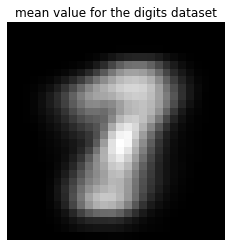

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetic
0,7.0,159.0,64.0,0.0,0.0,27.4,0.294,40.0,-1
1,0.0,180.0,66.0,39.0,0.0,42.0,1.893,25.0,1
2,1.0,146.0,56.0,0.0,0.0,29.7,0.564,29.0,-1
3,2.0,71.0,70.0,27.0,0.0,28.0,0.586,22.0,-1
4,7.0,103.0,66.0,32.0,0.0,39.1,0.344,31.0,1
...,...,...,...,...,...,...,...,...,...
704,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,-1
705,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,-1
706,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,-1
707,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


In [ ]:
# quick look at the data
print("shape of x1: ", x1.shape, 'shape of y1: ', y1.shape)
print('shape of x2: ', x2.shape, 'shape of y2: ', y2.shape)
print(x1_var)
print('shape of xt2: ', xt2.shape, 'shape of yt2: ', yt2.shape)

# compute the mean
x1_mean = np.mean(x1, axis = 0)
x2_mean = np.mean(x2, axis = 0)
print('mean values for each variable of pima dataset: \n', x1_mean)
pl.figure()
pl.imshow(x2_mean.reshape(28, 28), cmap='gray')
pl.title('mean value for the digits dataset')
pl.axis('off')
pl.show()

# show the data
data = pd.DataFrame(data = x1, columns = x1_var)
data['diabetic'] = y1
data

Interptret: the mean values of variables for Pima data are the average value of each features of the 709 samples.  
the mean values of variables for digits are the average value of each pixel of 3000 images, so the output is the average image of all images.

# 2 Predicting Diabets on the Pima dataset

## 2.1 Know the data

### Visualize the data as scatterplots between pairs of variables

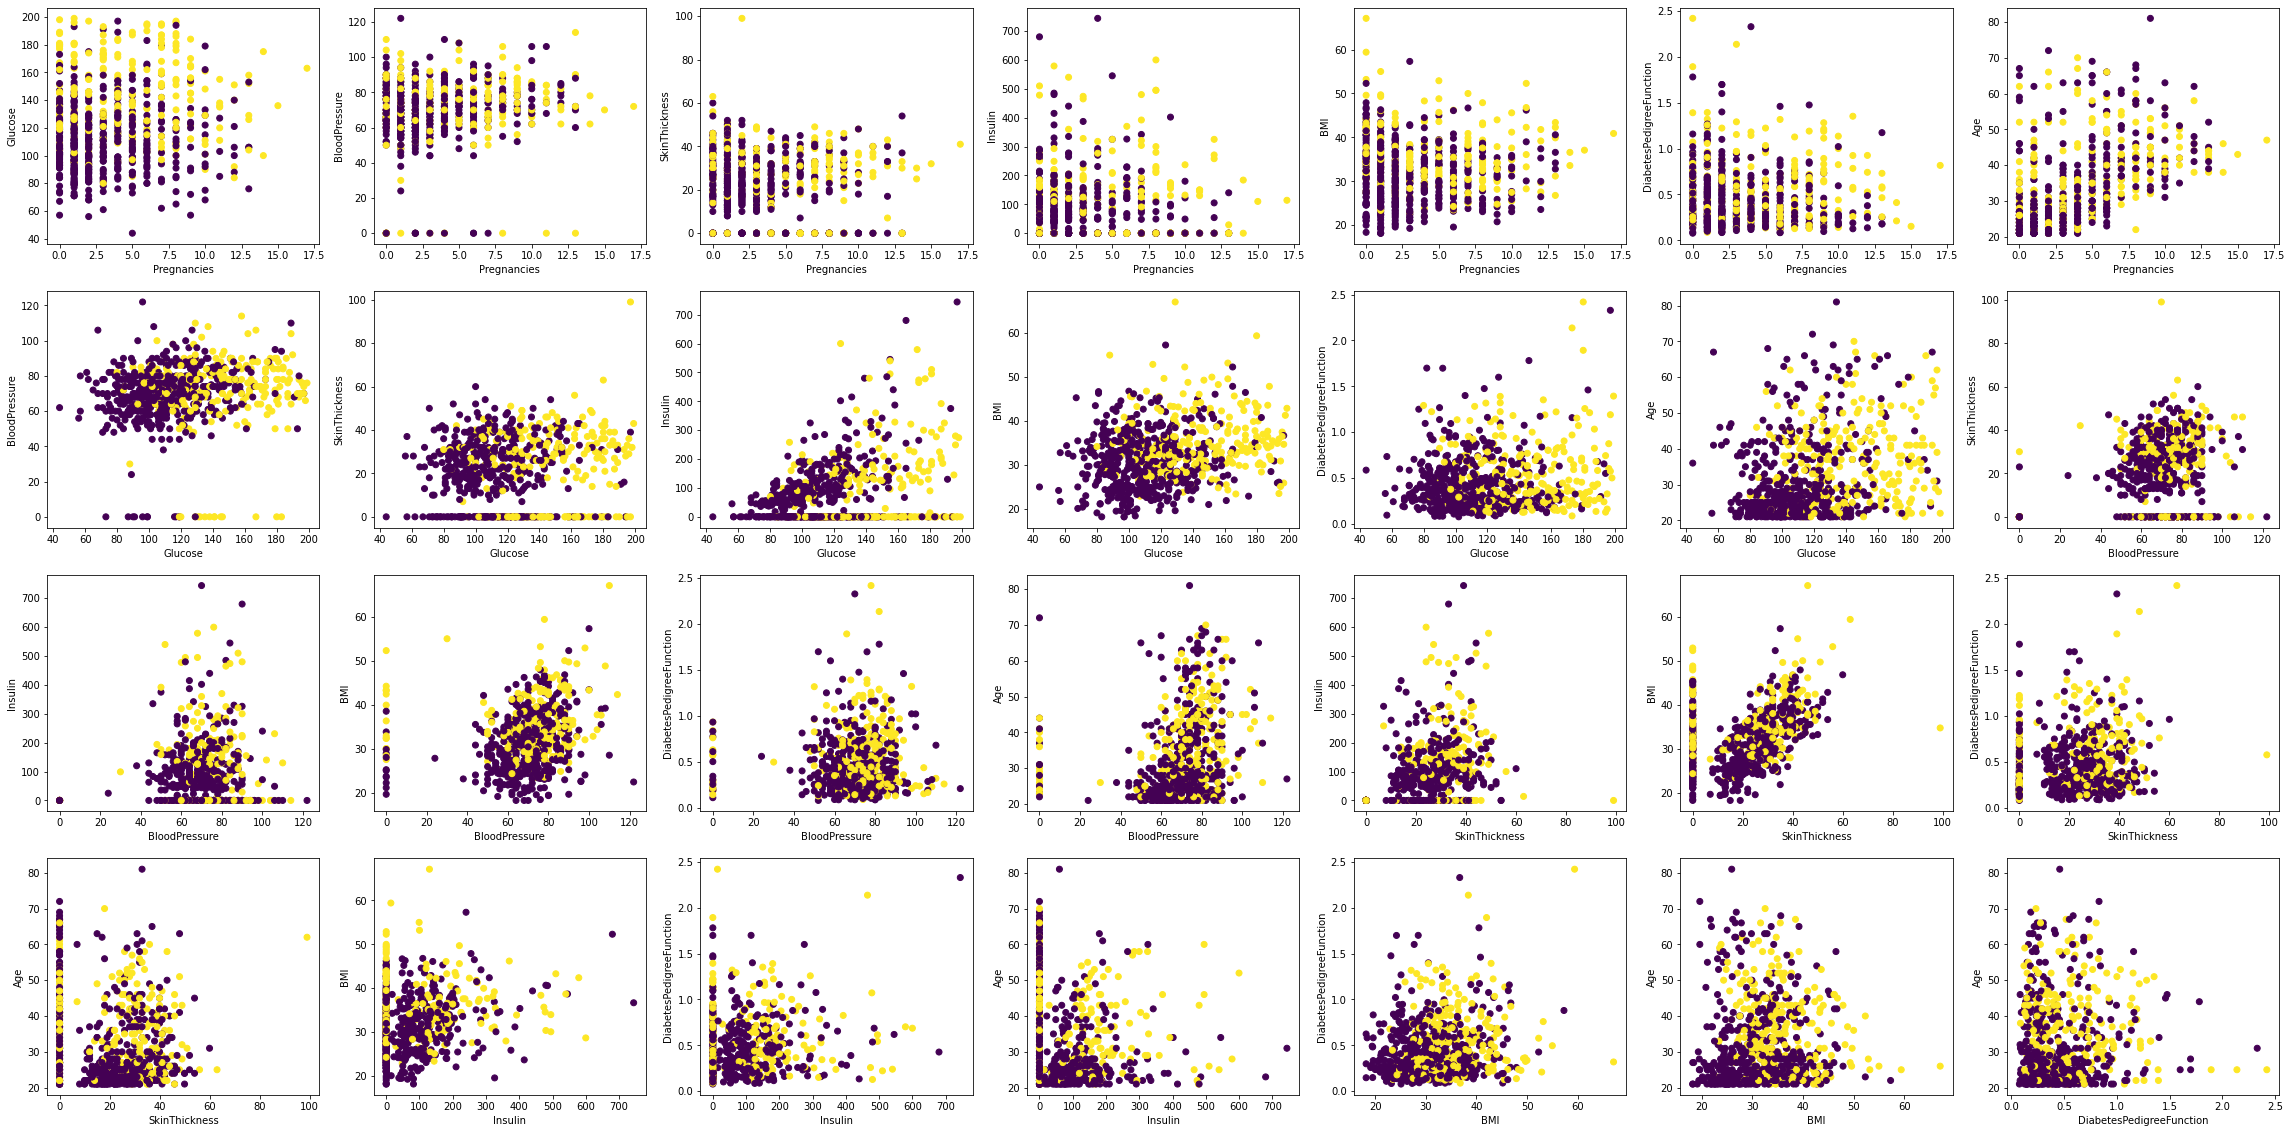

In [ ]:
# scatter plots between paris of variables
pl.figure(figsize=(40, 20))
ind = 0
for i in range(8):
  for j in range(i+1, 8):
    ind += 1
    pl.subplot(4, 7, ind)
    pl.scatter(x1[:, i], x1[:, j], c=y1)
    pl.xlabel(x1_var[i])
    pl.ylabel(x1_var[j])
pl.show()

Remark: I plot every pair of the 8 variables, thus 28 scatter plots to show the connection between them, purple is the positive label.

### What are the variables that seem to help predict the calss? Do those variables make sense from a medical perspective?

Answer: It seems (Glucose, BMI)  and (Glucose, Pregnancies) and (Glucose, DiabetesPedigreeFunction) are the pairs helpful to predict the class, overall, the variable Glucose has the most ability to predict the class because we can see in the plot, the labels are seperated along Glucose, this is true from a medical perspective since Glucose indeed is the cause of diabets.







### Split the data in training and test set by kepping n=300 samples for training

In [ ]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=300)
print(x1_train.shape, x1_test.shape)

(300, 8) (409, 8)


### Do the features have similar variance/scaling? Is that a problem?

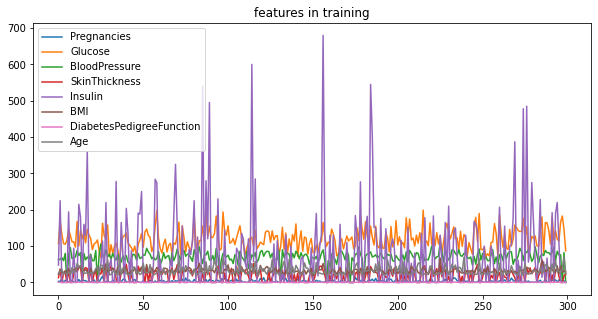

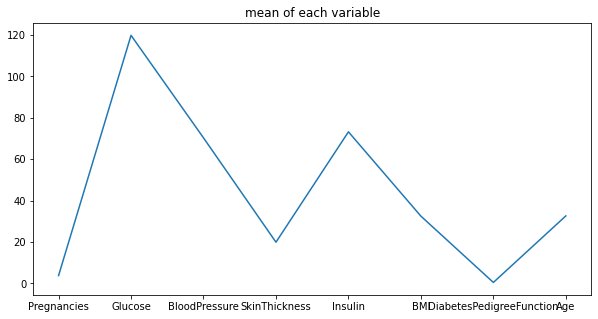

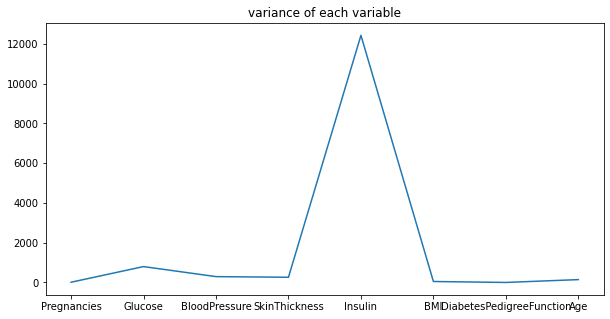

the Insulin has variance of 12427.79595555559


In [ ]:
# plot the features
pl.figure(figsize=(10,5))
pl.plot(x1_train)
pl.legend(x1_var)
pl.title('features in training')
pl.show()

# compute the mean
m = np.mean(x1_train, axis=0)
pl.figure(figsize=(10,5))
pl.plot(x1_var, m)
pl.title('mean of each variable')
pl.show()

# compute the variance
var = np.var(x1_train, axis=0)
pl.figure(figsize=(10,5))
pl.plot(x1_var, var)
pl.title('variance of each variable')
pl.show()

print('the', x1_var[4], 'has variance of', var[4])

Answer: By seeing the mean and variance of every feature, we can see than they are not in the same scale, Glucose has 120 mean value while Pregnancies has near to 0, and Insulin has variance 12000 while others have small variance.  
This would be a problem for machine learning because if the featrues don't have the same scaling, it will influence the shape of the objiective funcion, making the optimization harder and slower, so the standardization is needed to make the optimization easier.

### Apply a stabdaruzation to the training and test data(StandardScaler).

In [ ]:
# apply standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1_train = scaler.fit_transform(x1_train)
x1_test = scaler.transform(x1_test)

## 2.2 Bayesian decision and linear classification

### Train a LDA classifier, compute its accuracy and AUC on test data

In [ ]:
# train a LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_lda = LinearDiscriminantAnalysis()

clf_lda.fit(x1_train, y1_train)
pred_lda = clf_lda.predict(x1_test)

# compute accuracy
from sklearn.metrics import accuracy_score
acc_lda = accuracy_score(y1_test, pred_lda)
# compute AUC on test data
from sklearn.metrics import roc_auc_score
proba_lda = clf_lda.predict_proba(x1_test)[:,1]
auc_lda = roc_auc_score(y1_test, proba_lda)
print('the accuracy on test set is: ', acc_lda)
print('AUC on test: ', auc_lda)

the accuracy on test set is:  0.7652811735941321
AUC on test:  0.8449664429530201


### Perform a cross validation for the parameters of the method

In [ ]:
# train a LDA
from sklearn.model_selection import GridSearchCV
parameter_list = np.linspace(0,1,50)

parameter_list = list(parameter_list)
parameter_list.append(None)
parameter_list.append('auto')
# create parameter list
parameters = {'shrinkage': parameter_list}
# train a Grid search 
lda = LinearDiscriminantAnalysis(solver="lsqr")
lda_cv = GridSearchCV(lda, parameters)

lda_cv.fit(x1_train, y1_train)
lda_best_params = lda_cv.best_params_
lda_best = lda_cv.best_estimator_
print('best parameters: ', lda_best_params)

pred = lda_best.predict(x1_test)
# compute accuracy
acc_lda_cv = accuracy_score(y1_test, pred)
# compute AUC on test data
proba_lda_cv = lda_best.predict_proba(x1_test)[:,1]
auc_lda_cv = roc_auc_score(y1_test, proba_lda_cv)
print('the accuracy on test set is: ', acc_lda_cv)
print('AUC on test: ', auc_lda_cv)

best parameters:  {'shrinkage': 0.7142857142857142}
the accuracy on test set is:  0.7237163814180929
AUC on test:  0.8172689726381002


Answer: If we add the parameter shrinkage, we should set solver='lsqr', and by doing cross validation on 50 values between 0 and 1, we get an optimal classifier, but the performance doesn't improve compared to the default parameter. The optimal value for the parameter is 0.7142857142857142.

### Train a QDA classifier, compute its accuracy and AUC on test data

In [ ]:
# train a QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_qda = QuadraticDiscriminantAnalysis()

clf_qda.fit(x1_train, y1_train)
pred = clf_qda.predict(x1_test)

# compute accuracy
from sklearn.metrics import accuracy_score
acc_qda = accuracy_score(y1_test, pred)
# compute AUC on test data
from sklearn.metrics import roc_auc_score
proba_qda = clf_qda.predict_proba(x1_test)[:,1]
auc_qda = roc_auc_score(y1_test, proba_qda)
print('the accuracy on test set is: ', acc_qda)
print('AUC on test: ', auc_qda)

the accuracy on test set is:  0.7237163814180929
AUC on test:  0.8163913267940114


Answer: The performance of the QDA is not better than LDA using the default parameter.

### Perform a cross validation for the parameters (reg_param) of the method

In [ ]:
# train a QDA

parameter_list = np.linspace(0.0,1,50)
# create parameter list
parameters = {'reg_param': parameter_list}
# train a Grid search 
qda = QuadraticDiscriminantAnalysis()
qda_cv = GridSearchCV(qda, parameters)

qda_cv.fit(x1_train, y1_train)
qda_best_params = qda_cv.best_params_
qda_best = qda_cv.best_estimator_
print('best parameters: ', qda_best_params)

pred = qda_best.predict(x1_test)
# compute accuracy
acc_qda_cv = accuracy_score(y1_test, pred)
# compute AUC on test data
proba_qda_cv = qda_best.predict_proba(x1_test)[:,1]
auc_qda_cv = roc_auc_score(y1_test, proba_qda_cv)
print('the accuracy on test set is: ', acc_qda_cv)
print('AUC on test: ', auc_qda_cv)

best parameters:  {'reg_param': 0.5306122448979591}
the accuracy on test set is:  0.7359413202933985
AUC on test:  0.8201342281879194


Answer: After trying 50 values of reg_param from 0 to 1, the validation leads to a better performance compared to the default case, the best value for reg_param is 0.5306122448979591.

### Train a Gaussian Naive Bayes classifier. What is its performance with respect to QDA and LDA?

In [ ]:
# train a Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
# fit the model
clf_nb = GaussianNB()
clf_nb.fit(x1_train, y1_train)

# predict test label
pred = clf_nb.predict(x1_test)

# compute accuracy
acc_nb = accuracy_score(y1_test, pred)
# compute AUC on test data
proba_nb = clf_nb.predict_proba(x1_test)[:,1]
auc_nb = roc_auc_score(y1_test, proba_nb)
print('the accuracy on test set is: ', acc_nb)
print('AUC on test: ', auc_nb)

the accuracy on test set is:  0.7237163814180929
AUC on test:  0.8008518327310274


Answer: Using Naive Bayes, the accuracy (0.73) is very close to the LDA with cross validation (0.72) and QDA with default parameters (0.72) and QDA with cross validation(0.73) , but a bit worse than LDA with default parameter(0.765). But the AUC score is worse than any of those case.

### Train a Logistic regression classifier with the default parameters. Compute its performance and compare it to the previous classifiers.

In [ ]:
# train a Logistic regression classifier
from sklearn.linear_model import LogisticRegression
# fit the model
clf_lr = LogisticRegression()
clf_lr.fit(x1_train, y1_train)

# predict test label
pred_lr = clf_lr.predict(x1_test)

# compute accuracy
acc_lr = accuracy_score(y1_test, pred_lr)
# compute AUC on test data
proba_lr = clf_lr.predict_proba(x1_test)[:,1]
auc_lr = roc_auc_score(y1_test, proba_lr)
print('the accuracy on test set is: ', acc_lr)
print('AUC on test: ', auc_lr)

the accuracy on test set is:  0.7628361858190709
AUC on test:  0.8440371708828085


Answer: The performance of logistic regression classifier is very close to the LDA with default parameters: 0.765 for accuracy and 0.844 for AUC, and it is better than any other cases.

### Performe a cross validation for the parameters of the model (C) by setting the penalization to L1. Is the model sparse? What variables were removed from the model? Is the classifier performing well?

In [ ]:
# train a Logistic regression classifier
parameter_list = np.linspace(0.01,1,100)
# create parameter list
parameters = {'C': parameter_list}
# train a Grid search 
lr = LogisticRegression(penalty='l1', solver='liblinear')
lr_cv = GridSearchCV(lr, parameters)

lr_cv.fit(x1_train, y1_train)
lr_best_params = lr_cv.best_params_
lr_best = lr_cv.best_estimator_
print('best parameters: ', lr_best_params)

pred = lr_best.predict(x1_test)
# compute accuracy
acc_lr_cv = accuracy_score(y1_test, pred)
# compute AUC on test data
proba_lr_cv = lr_best.predict_proba(x1_test)[:,1]
auc_lr_cv = roc_auc_score(y1_test, proba_lr_cv)
print('the accuracy on test set is: ', acc_lr_cv)
print('AUC on test: ', auc_lr_cv)

best parameters:  {'C': 0.14}
the accuracy on test set is:  0.7579462102689487
AUC on test:  0.8443985544656686


Answer: In order to use l1 penalty, I set solver = 'liblinear', after grid search, the performance outcomes all other methods, becomes the best model so far, and the best C value is 0.14.

[0.3313552  0.72685832 0.         0.         0.         0.54139402
 0.22838763 0.12782978]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


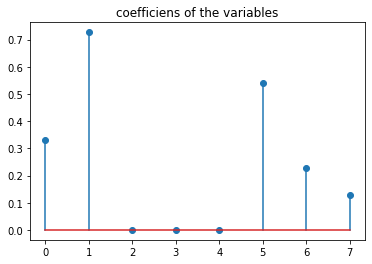

In [ ]:
# show the variables
var_lr_best = lr_best.coef_[0]
print(var_lr_best)
pl.figure()
pl.title('coefficiens of the variables')
pl.stem(abs(var_lr_best))
pl.show()

Answer: The variable 2, 3, 4 is set to 0 after logistic regression classifier using l1 penalty. The model becomes sparser than before because it has three 0 coefficients. If we decrease C, the model will be more sparse. The variable "BloodPressure"	"SkinThickness"	"Insulin" is removed from the model, turns out those variable are less needed for prediction while the model still make a very good performance.

### What is the best decision method so far? Is the best model linear or quadratic?

Answer: The best model so far is the LDA, this is a linear model. And we can see that Linear model is better than quadratic model in our setting.

### Interpret the separability of the sample in the predicted score space by plotting histograms for the samples for each class in 1D.

Text(0.5, 1.0, 'lr')

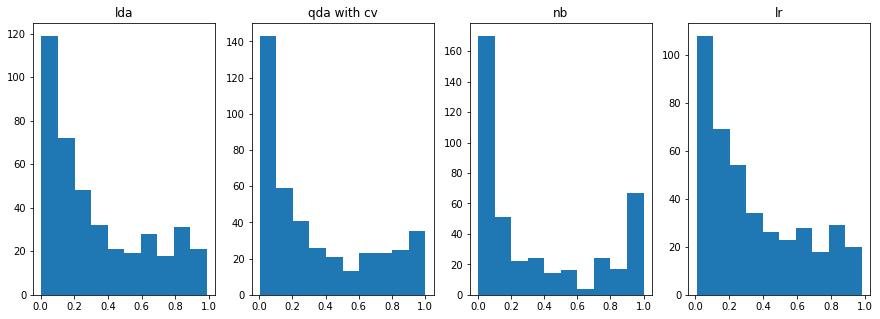

In [ ]:
# we only choose the models with best performance(with or withour cross validation)
# for LDA
pl.figure(figsize=(15,5))
pl.subplot(141)
pl.hist(proba_lda)
pl.title('lda')
pl.subplot(142)
pl.hist(proba_qda_cv)
pl.title('qda with cv')
pl.subplot(143)
pl.hist(proba_nb)
pl.title('nb')
pl.subplot(144)
pl.hist(proba_lr)
pl.title('lr')

Answer: By showing the histograms of the predicted probability on the test set, we can see that if the probability is close to 0 or 1, than the model can seperate well the classes, we can see that the model QDA and NB can seperate better the samples because most of their samples has probability close to 0 or 1, while LDA and LR have most of the samples in the middle of the histograms.

### Interpret the weight for a good linear model.

[0.33128431 0.72671692 0.         0.         0.         0.54141331
 0.22840733 0.12790464]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


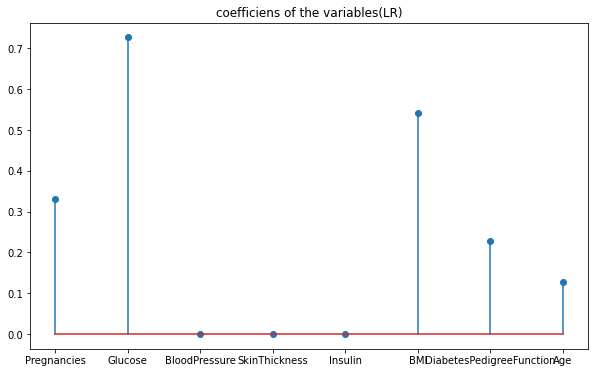

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


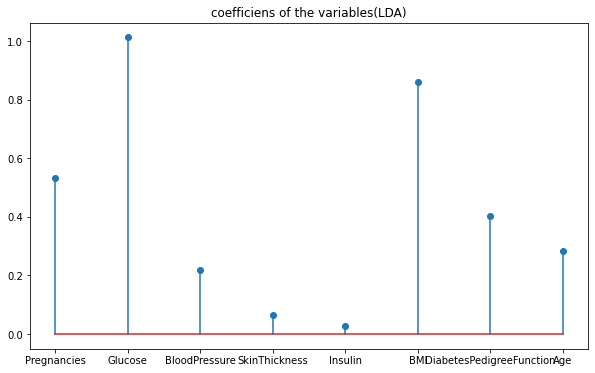

In [ ]:
var_lr_best = lr_best.coef_[0]
print(var_lr_best)
pl.figure(figsize=(10,6))
pl.title('coefficiens of the variables(LR)')
pl.stem(x1_var,abs(var_lr_best))
pl.show()

var_lda = clf_lda.coef_[0]
pl.figure(figsize=(10,6))
pl.title('coefficiens of the variables(LDA)')
pl.stem(x1_var,abs(var_lda))
pl.show()

Answer: The LR model and LDA model show the same oreder of importance of variables, the variables which have the most effect are "Gloucose" and "BMI", follows "Pregnancies" "DiabetesPedigressFunction" and "Age", the "BloodPressure" "SkinThickness" and "Insulin" have the least effect.  
This is true and we have already seen this in the first section by plotting the pairs of the variables.

## 2.3 Nonlinear methods

In [ ]:
# the performance the linear classifiers
print('scores for every classifiers shown above')
print('only the best performance is shown\n')
# LDA
print('---LDA with default parameters---')
print('accuracy: ', acc_lda)
print('AUC:   ', auc_lda)
# QDA
print('\n---QDA with cross validation---')
print('accuracy: ', acc_qda_cv)
print('AUC:   ', auc_qda_cv)
# NB
print('\n---NB with default parameters---')
print('accuracy: ', acc_nb)
print('AUC:   ', auc_nb)
# LR
print('\n---LR with cross validation---')
print('accuracy: ', acc_lr_cv)
print('AUC:   ', auc_lr_cv)

scores for every classifiers shown above
only the best performance is shown

---LDA with default parameters---
accuracy:  0.7652811735941321
AUC:    0.8449664429530201

---QDA with cross validation---
accuracy:  0.7359413202933985
AUC:    0.8201342281879194

---NB with default parameters---
accuracy:  0.7237163814180929
AUC:    0.8008518327310274

---LR with cross validation---
accuracy:  0.7579462102689487
AUC:    0.8443985544656686


### Random Forest Classifier

#### Fit the model with the default parameters and compute its prediction performance. Is it better than a linear estimator?

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()

# fit the model
clf_rf.fit(x1_train, y1_train)

# make predicitons
pred = clf_rf.predict(x1_test)

# compute performance
# compute accuracy
acc_rf = accuracy_score(y1_test, pred)
# compute AUC on test data
proba = clf_rf.predict_proba(x1_test)[:,1]
auc_rf = roc_auc_score(y1_test, proba)
print("----RandomForestClassifier---")
print('the accuracy on test set is: ', acc_rf)
print('AUC on test: ', auc_rf)

----RandomForestClassifier---
the accuracy on test set is:  0.7579462102689487
AUC on test:  0.827787816210635


Answer: The Random Forset Classifier with default parameters has the same accuracy as LR with cross validation, it is better than other models, and the AUC is worse than LR but better other models.

#### Do a quick validation of some of the important parameters, can you find a better performance?

In [ ]:
# Using grid search
# on paramter max_depth and n_estimators
max_depth_list = np.arange(1, 10, 1)
n_estimators_list = np.arange(10,200,10)
parameters = {'max_depth': max_depth_list, 'n_estimators': n_estimators_list}
# train a grid search
rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, parameters)

rf_cv.fit(x1_train, y1_train)

# get the best estimator
rf_best_params = rf_cv.best_params_
rf_best = rf_cv.best_estimator_
print('best parameters: ', rf_best_params)

# predict on test
pred = rf_best.predict(x1_test)

# compute performance
# compute accuracy
acc_rf_cv = accuracy_score(y1_test, pred)
# compute AUC on test data
proba = rf_best.predict_proba(x1_test)[:,1]
auc_rf_cv = roc_auc_score(y1_test, proba)
print("----RandomForestClassifier---")
print('the accuracy on test set is: ', acc_rf_cv)
print('AUC on test: ', auc_rf_cv)

best parameters:  {'max_depth': 4, 'n_estimators': 60}
----RandomForestClassifier---
the accuracy on test set is:  0.7628361858190709
AUC on test:  0.8256066081569438


Answer: I validate the parameters 'max_depth' and 'n_estimators', I find a better performance in both accuracy and AUC, the best parameters are: 'max_depth': 4, 'n_estimators': 60.

### SVC

#### Fit the model with the default parameters and compute its prediction performance. Is it better than a linear estimator?

In [ ]:
from sklearn.svm import SVC

clf_svc = SVC(probability=True)

# fit the model
clf_svc.fit(x1_train, y1_train)

# make predicitons
pred = clf_svc.predict(x1_test)

# compute performance
# compute accuracy
acc_svc = accuracy_score(y1_test, pred)
# compute AUC on test data
proba = clf_svc.predict_proba(x1_test)[:,1]
auc_svc = roc_auc_score(y1_test, proba)
print("----SVC---")
print('the accuracy on test set is: ', acc_svc)
print('AUC on test: ', auc_svc)

----SVC---
the accuracy on test set is:  0.7286063569682152
AUC on test:  0.8178110480123904


Answer: the performance of SVC with default parameters is close to NB model, but worse than any other model.

#### Do a quick validation of some of the important parameters, can you find a better performance?

In [ ]:
# Using grid search
# on paramter C
C_list = np.linspace(0.001, 1, 100)
parameters = {'C': C_list}
# train a grid search
svc = SVC(probability=True)
svc_cv = GridSearchCV(svc, parameters)

svc_cv.fit(x1_train, y1_train)

# get the best estimator
svc_best_params = svc_cv.best_params_
svc_best = svc_cv.best_estimator_
print('best parameters: ', svc_best_params)

# predict on test
pred = svc_best.predict(x1_test)

# compute performance
# compute accuracy
acc_svc_cv = accuracy_score(y1_test, pred)
# compute AUC on test data
proba = svc_best.predict_proba(x1_test)[:,1]
auc_svc_cv = roc_auc_score(y1_test, proba)
print("----SVC---")
print('the accuracy on test set is: ', acc_svc_cv)
print('AUC on test: ', auc_svc_cv)

best parameters:  {'C': 0.6367272727272728}
----SVC---
the accuracy on test set is:  0.7359413202933985
AUC on test:  0.8166881775942179


Answer: After a validation of "c", the accuracy incresed a little but the AUC decrese a bit.

### MLPClassifier

#### Fit the model with the default parameters and compute its prediction performance. Is it better than a linear estimator?

In [ ]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier()

# fit the model
clf_mlp.fit(x1_train, y1_train)

# make predicitons
pred = clf_mlp.predict(x1_test)

# compute performance
# compute accuracy
acc_mlp = accuracy_score(y1_test, pred)
# compute AUC on test data
proba = clf_mlp.predict_proba(x1_test)[:,1]
auc_mlp = roc_auc_score(y1_test, proba)
print("----MLPClassifier---")
print('the accuracy on test set is: ', acc_mlp)
print('AUC on test: ', auc_mlp)

----MLPClassifier---
the accuracy on test set is:  0.7701711491442543
AUC on test:  0.8428497676819824


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Answer: The accuracy of MLPClassifier using default parameters is better than any other methods, it reached 0.77, the AUC is slightly worse than LDA with defualt parameter and LR with cross validation, but overall this is the best model compared to others.

#### Do a quick validation of some of the important parameters, can you find a better performance?

In [ ]:
# Using grid search
# on paramter max_iter and alpha
#max_iter_list = np.arange(50, 550, 100) 
alpha_list = np.linspace(0.001, 0.1, 50)
parameters = {'alpha':alpha_list}
# train a grid search
mlp = MLPClassifier()
mlp_cv = GridSearchCV(mlp, parameters)

mlp_cv.fit(x1_train, y1_train)

# get the best estimator
mlp_best_params = mlp_cv.best_params_
mlp_best = mlp_cv.best_estimator_
print('best parameters: ', mlp_best_params)

# predict on test
pred = mlp_best.predict(x1_test)

# compute performance
# compute accuracy
acc_mlp_cv = accuracy_score(y1_test, pred)
# compute AUC on test data
proba = mlp_best.predict_proba(x1_test)[:,1]
auc_mlp_cv = roc_auc_score(y1_test, proba)
print("----MLPClassifier---")
print('the accuracy on test set is: ', acc_mlp_cv)
print('AUC on test: ', auc_mlp_cv)

best parameters:  {'alpha': 0.05757142857142858}
----MLPClassifier---
the accuracy on test set is:  0.7628361858190709
AUC on test:  0.8432885906040268


Answer: After the validation of parameter "alpha", the accuracy doesn't improve but the AUC imporved a bit, but the difference is not too much.

### Gradient Boosting Classifier

#### Fit the model with the default parameters and compute its prediction performance. Is it better than a linear estimator?

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier()

# fit the model
clf_gb.fit(x1_train, y1_train)

# make predicitons
pred = clf_gb.predict(x1_test)

# compute performance
# compute accuracy
acc_gb = accuracy_score(y1_test, pred)
# compute AUC on test data
proba = clf_gb.predict_proba(x1_test)[:,1]
auc_gb = roc_auc_score(y1_test, proba)
print("----GradientBoostingClassifier---")
print('the accuracy on test set is: ', acc_gb)
print('AUC on test: ', auc_gb)

----SVC---
the accuracy on test set is:  0.7701711491442543
AUC on test:  0.8278523489932885


Answer: The accuracy is the same as the MLPClassifier, which is the best so far, but the AUC is a bit wrose, very close to QDA with cross validation.

#### Do a quick validation of some of the important parameters, can you find a better performance?

In [ ]:
# Using grid search
# on paramter n_estimators and max_depth
max_depth_list = np.arange(1, 10, 1)
n_estimators_list = np.arange(10,200,10)
parameters = {'n_estimators': n_estimators_list, 'max_depth': max_depth_list}
# train a grid search
gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, parameters)

gb_cv.fit(x1_train, y1_train)

# get the best estimator
gb_best_params = gb_cv.best_params_
gb_best = gb_cv.best_estimator_
print('best parameters: ', gb_best_params)

# predict on test
pred = gb_best.predict(x1_test)

# compute performance
# compute accuracy
acc_gb_cv = accuracy_score(y1_test, pred)
# compute AUC on test data
proba = gb_best.predict_proba(x1_test)[:,1]
auc_gb_cv = roc_auc_score(y1_test, proba)
print("----GradientBoostingClassifier---")
print('the accuracy on test set is: ', acc_gb_cv)
print('AUC on test: ', auc_gb_cv)

best parameters:  {'max_depth': 2, 'n_estimators': 50}
----GradientBoostingClassifier---
the accuracy on test set is:  0.7579462102689487
AUC on test:  0.8365513680949923


Answer: After the validation of "max_depth" and "n_estimators" the accuracy doesn't improve but the AUC has improved/

## 2.4 Comparison and interpretation

### Collect the test performances for all methods investigated above in a table. Which methods work the best in practice?

In [ ]:
from matplotlib.pylab import NaN
# again, we will only save the model with the best performance.
dict = {'model': ['LDA', 'QDA', 'NB', 'LR', 'RandomForest', 'SVC', 'MLP', 'GradientBoosting'],
        'accuracy without cv': [acc_lda, acc_qda, acc_nb, acc_lr, acc_rf, acc_svc, acc_mlp, acc_gb],
        'AUC without cv': [auc_lda, auc_qda, auc_nb, auc_lr, auc_rf, auc_svc, auc_mlp, auc_gb],
        'accuracy with cv': [acc_lda_cv, acc_qda_cv, np.NaN, acc_lr_cv, acc_rf_cv, acc_svc_cv, acc_mlp_cv, acc_gb_cv],
        'AUC with cv': [auc_lda_cv, auc_qda_cv, np.NaN, auc_lr_cv, auc_rf_cv, auc_svc_cv, auc_mlp_cv, auc_gb_cv]}
score_df = pd.DataFrame(dict)
score_df

,model,accuracy without cv,AUC without cv,accuracy with cv,AUC with cv
0,LDA,0.765281,0.844966,0.723716,0.817269
1,QDA,0.723716,0.816391,0.735941,0.820134
2,NB,0.723716,0.800852,NaN,NaN
3,LR,0.762836,0.844037,0.757946,0.844399
4,RandomForest,0.757946,0.827788,0.762836,0.825607
5,SVC,0.728606,0.817811,0.735941,0.816688
6,MLP,0.770171,0.842850,0.762836,0.843289
7,GradientBoosting,0.770171,0.827852,0.757946,0.836551


Answer: by looking at the table above, the MLPClassifier with default parameters has the best accuracy and top AUC score, so the MLP should work the best in practice.

### Which model is best from a medical/practical perspective? Do we need non-linearity in this application?

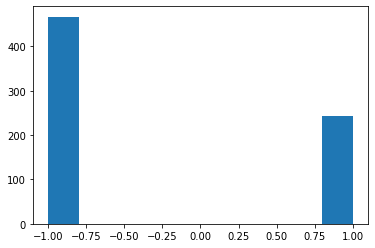

In [ ]:
# plot the labels in this dataset
pl.figure()
pl.hist(y1)
pl.show()

Answer: We can see that the labels of positive and negative is not equal, so the accuracy might not be a good metric to tell wether the model is good or not, the model might predict more negative samples in order to have a high accuracy, but this is not acceptable in practice especially in medical perspective. So we need to look at the AUC score, which is the degree of reasonableness it gives to the ordering of all samples and by changing threshold we can get better accuracy.  
So I would say the best model is LDA with default parameters since it has the best AUC.  
The non-linearity is not needed in this application because the features is simple and only 8, the linear models already give a good result.

### For the best model, compute the confusion matrix for the test data. What is the false negative rate (FNR)(FN/(FN+TP)) for this classifier? Is it good for this kind of applications?

[[229  31]
 [ 65  84]]


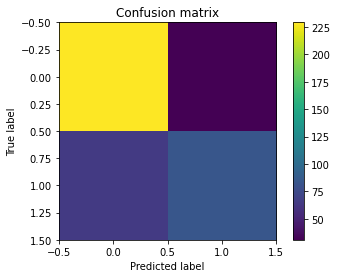

FNR:  0.436241610738255


In [ ]:
# We choose the LDA model with default parameters.
from sklearn.metrics import confusion_matrix
pred = clf_lda.predict(x1_test)
cm = confusion_matrix(y1_test, pred)

print(cm)
pl.figure()
pl.imshow(cm)
pl.title('Confusion matrix')
pl.xlabel('Predicted label')
pl.colorbar()
pl.ylabel('True label')
pl.show()

tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

# calculating the false negative rate
fnr = (fn)/(fn+tp)
print("FNR: ", fnr)

Answer: The false negative rate is 0.4362, I think this is not good for this kind of applications, many patients would have false negative, this is too much.

[[222  38]
 [ 56  93]]


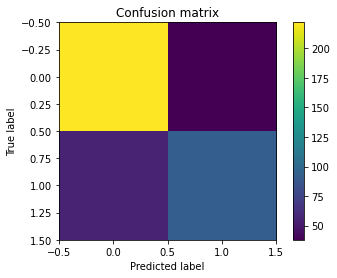

FNR:  0.37583892617449666


In [ ]:
# test on mlp
from sklearn.metrics import confusion_matrix
pred = clf_mlp.predict(x1_test)
cm = confusion_matrix(y1_test, pred)

print(cm)
pl.figure()
pl.imshow(cm)
pl.title('Confusion matrix')
pl.xlabel('Predicted label')
pl.colorbar()
pl.ylabel('True label')
pl.show()

tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

# calculating the false negative rate
fnr = (fn)/(fn+tp)
print("FNR: ", fnr)

Answer: We can see the mlp has a lower FNR, means this might be better than LDA in practice, but still this could be too high in practice.

### Since a false negative can have an important medical impact, propose a new threshold for the predicted score that leads to a FNR of less that 10%.

In [ ]:
print('the original intercept is: ', clf_lda.intercept_)

the original intercept is:  [-1.22754459]


In [ ]:
# change intercept_ in LDA
clf_lda.intercept_ = 0.5
pred = clf_lda.predict(x1_test)
cm = confusion_matrix(y1_test, pred)

tn, fp, fn, tp = cm.ravel()

fnr = (fn)/(fn+tp)
print("FNR: ", fnr)

FNR:  0.0738255033557047


Answer: we can see that by setting manually the value of the intercept of LDA model leads to a FNR = 0.07. This is needed in practice to have lower accuracy but have a low FNR.

# 3 Predicting Classes on the Digits dataset

## 3.1 Evaluate the different supervised methods

### Linear Discriminant Analysis

#### Fit the model with the default parameters and compute its prediciton performance.

In [ ]:
# train a LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_lda_d = LinearDiscriminantAnalysis()

clf_lda_d.fit(x2, y2.ravel())
pred = clf_lda_d.predict(xt2)

# compute accuracy
from sklearn.metrics import accuracy_score
acc_lda_d = accuracy_score(yt2.ravel(), pred)
print('the accuracy on test set is: ', acc_lda_d)


the accuracy on test set is:  0.9333333333333333


Remark: We get a very high accuracy, this could because the digits dataset is simple, the features are easy to seperate, and we only have 3 classes here.

#### Do a quick validation of some of the important parameters to get a better performance if possible.

In [ ]:
# train a LDA and validate shrinkage
from sklearn.model_selection import GridSearchCV
parameter_list = np.linspace(0,1,10)

parameter_list = list(parameter_list)
parameter_list.append(None)
parameter_list.append('auto')
# create parameter list
parameters = {'shrinkage': parameter_list}
# train a Grid search 
lda = LinearDiscriminantAnalysis(solver="lsqr")
lda_cv = GridSearchCV(lda, parameters)

lda_cv.fit(x2, y2.ravel())

## store the model and parameters
lda_best_params_d = lda_cv.best_params_
lda_best_d = lda_cv.best_estimator_
print('best parameters: ', lda_best_params_d)

pred = lda_best_d.predict(xt2)
# compute accuracy
acc_lda_cv_d = accuracy_score(yt2.ravel(), pred)
print('the accuracy on test set is: ', acc_lda_cv_d)


best parameters:  {'shrinkage': 0.5555555555555556}
the accuracy on test set is:  0.9466666666666667


Remark: use cross validation to select the best shrinkage value we get 0.55, and this make the result even better, which reaches 0.946.

### Logistic Regression

#### Fit the model with the default parameters and compute its prediciton performance.

In [ ]:
# train a Logistic regression classifier
from sklearn.linear_model import LogisticRegression
# fit the model
clf_lr_d = LogisticRegression()
clf_lr_d.fit(x2, y2.ravel())

# predict test label
pred = clf_lr_d.predict(xt2)

# compute accuracy
acc_lr_d = accuracy_score(yt2.ravel(), pred)
# compute AUC on test data
print('the accuracy on test set is: ', acc_lr_d)

the accuracy on test set is:  0.9653333333333334


Remark: Using the default parameters for Logistic Regression we get a better accuracy than the Linear Discriminant Analysis model.  

#### Do a quick validation of some of the important parameters to get a better performance if possible.

In [ ]:
# train a Logistic regression classifier and validate C and max_iter
C_list = np.linspace(0.2,1,10)
max_iter_list = np.arange(50, 550, 100)
# create parameter list
parameters = {'C': C_list, 'max_iter':max_iter_list}
# train a Grid search 
lr = LogisticRegression()
lr_cv = GridSearchCV(lr, parameters)

lr_cv.fit(x2, y2.ravel())

## store the model and parameters
lr_best_params_d = lr_cv.best_params_
lr_best_d = lr_cv.best_estimator_
print('best parameters: ', lr_best_params_d)

pred = lr_best_d.predict(xt2)
# compute accuracy
acc_lr_d = accuracy_score(yt2.ravel(), pred)
print('the accuracy on test set is: ', acc_lr_d)

best parameters:  {'C': 0.37777777777777777, 'max_iter': 150}
the accuracy on test set is:  0.9673333333333334


Remark: With the validation of C and max_iter, we get a bit better accuracy, the improvement is limited due to the accuracy is high enough..

### SVC

#### Fit the model with the default parameters and compute its prediciton performance.

In [ ]:
from sklearn.svm import SVC

clf_svc_d = SVC()

# fit the model
clf_svc_d.fit(x2, y2.ravel())

# make predicitons
pred = clf_svc_d.predict(xt2)

# compute performance
# compute accuracy
acc_svc_d = accuracy_score(yt2.ravel(), pred)
print("----SVC---")
print('the accuracy on test set is: ', acc_svc_d)


----SVC---
the accuracy on test set is:  0.9833333333333333


Remark: The SVC gives very high accuracy of 0.98, shows that SVC is indeed a good classifier in relevent situations.

#### Do a quick validation of some of the important parameters to get a better performance if possible.

In [ ]:
# Using grid search
# on paramter C
C_list = np.linspace(0.001, 1, 100)
parameters = {'C': C_list}
# train a grid search
svc = SVC()
svc_cv = GridSearchCV(svc, parameters)

svc_cv.fit(x2, y2.ravel())

# get the best estimator
svc_best_params_d = svc_cv.best_params_
svc_best_d = svc_cv.best_estimator_
print('best parameters: ', svc_best_params_d)

# predict on test
pred = svc_best_d.predict(xt2)

# compute performance
# compute accuracy
acc_svc_cv_d = accuracy_score(yt2.ravel(), pred)
print("----SVC---")
print('the accuracy on test set is: ', acc_svc_cv_d)

best parameters:  {'C': 0.7477272727272728}
----SVC---
the accuracy on test set is:  0.98


Remark: The validation on C doesn't improve the perfprmance, still I think this because the accuracy is high enough.


### MLPClassifier

#### Fit the model with the default parameters and compute its prediciton performance.

In [ ]:
from sklearn.neural_network import MLPClassifier

clf_mlp_d = MLPClassifier()

# fit the model
clf_mlp_d.fit(x2, y2.ravel())

# make predicitons
pred = clf_mlp_d.predict(xt2)

# compute performance
# compute accuracy
acc_mlp_d = accuracy_score(yt2.ravel(), pred)
print("----MLPClassifier---")
print('the accuracy on test set is: ', acc_mlp_d)

----MLPClassifier---
the accuracy on test set is:  0.9806666666666667


Remark: the MLPClassifier gives an accuracy of 0.98, a bit worse than SVC but it is still a very good performance.

#### Do a quick validation of some of the important parameters to get a better performance if possible.

In [ ]:
# Using grid search
# on paramter max_iter and alpha
max_iter_list = np.arange(100, 500, 100) 
alpha_list = np.linspace(0.001, 0.01, 10)
parameters = {'max_iter': max_iter_list, 'alpha':alpha_list}
# train a grid search
mlp = MLPClassifier()
mlp_cv = GridSearchCV(mlp, parameters)

mlp_cv.fit(x2, y2.ravel())

# get the best estimator
mlp_best_params_d = mlp_cv.best_params_
mlp_best_d = mlp_cv.best_estimator_
print('best parameters: ', mlp_best_params_d)

# predict on test
pred = mlp_best_d.predict(xt2)

# compute performance
# compute accuracy
acc_mlp_cv_d = accuracy_score(yt2.ravel(), pred)
print("----MLPClassifier---")
print('the accuracy on test set is: ', acc_mlp_cv_d)

best parameters:  {'alpha': 0.005, 'max_iter': 100}
----MLPClassifier---
the accuracy on test set is:  0.9826666666666667


Remark: The validation took a long time, but the accuracy increased a little.

## 3.2 Interpreting the classifier

### Compare the performances of the different methods . Which model is the best on test data?


In [ ]:
# all the accuracies
print('accuracy on test data of every method')
print('LDA: ', acc_lda_cv_d)
print('LR: ', acc_lr_d)
print('SVC: ', acc_svc_d)
print('MLP: ', acc_mlp_cv_d)

accuracy on test data of every method
LDA:  0.9466666666666667
LR:  0.9673333333333334
SVC:  0.9833333333333333
MLP:  0.9826666666666667


Answer: We only choose the best performance of every model, the model with the highest accuracy is the SVC model, with default parameters.

### Select the best classifier from the previous section and use it to predict labels on the test data.

In [ ]:
# choose the SVC
# predict labels
pred_svc_d = clf_svc_d.predict(xt2)

### Compute the confusion matrix and interpret the errors made by the classifier. What is the class that is the most difficult to recognize? Are there somme classes that are harder to discriminate?

[[495   2   3]
 [ 12 484   4]
 [  0   4 496]]


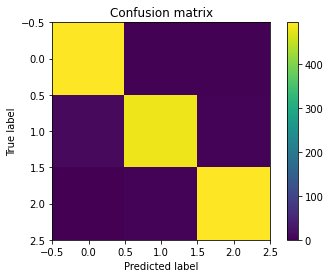

In [ ]:
# compute the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yt2, pred_svc_d, labels=[1,7,8])

print(cm)
pl.figure()
pl.imshow(cm)
pl.title('Confusion matrix')
pl.xlabel('Predicted label')
pl.colorbar()
pl.ylabel('True label')
pl.show()


Answer: By looking at the confusion matrix, most element are in the diagonal which are well predicted, the errors are:   
2 samples of "1" are misclassified as 7;  
3 samples of "1" are misclassified as 8;  
12 samples of "7" are misclassified as 1;  
4 samples of "7" are misclassified as 8;  
4 samples of "8" are misclassified as 7;  
The class that is the most hard to classify is 7.  
So the class 7 is harder to discriminate beacuse most errors are made on class 7, and this make sence because in handwriting, 7 is very close to 1, even human can't tell a number is 7 or 1 in some cases, and 7 is close to 9 sometimes, but we don't have 9 here, but 7 is the most hard class to discriminate.

### Plot some of the sample that are miss_classified. Are they difficult to recognize? Wgt did the classifier fail to recognize them?

25


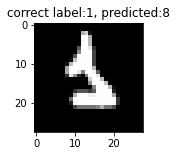

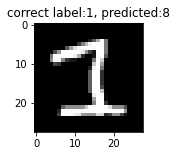

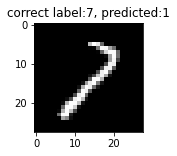

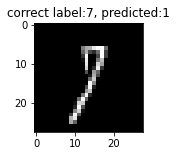

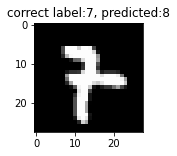

In [ ]:
# plot miss_classified samples
ind = []
for i in range(yt2.shape[0]):
  if pred_svc_d[i] != yt2[i]:
    ind.append(i)
print(len(ind))
pl.figure(figsize=(3,2))
pl.imshow(xt2[ind[0]].reshape(28, 28), cmap = 'gray')
pl.title('correct label:%d, predicted:%d' %(yt2[ind[0]], pred_svc_d[ind[0]]))
pl.show()
pl.figure(figsize=(3,2))
pl.imshow(xt2[ind[2]].reshape(28, 28), cmap = 'gray')
pl.title('correct label:%d, predicted:%d' %(yt2[ind[2]], pred_svc_d[ind[2]]))
pl.show()
pl.figure(figsize=(3,2))
pl.imshow(xt2[ind[10]].reshape(28, 28), cmap = 'gray')
pl.title('correct label:%d, predicted:%d' %(yt2[ind[10]], pred_svc_d[ind[10]]))
pl.show()
pl.figure(figsize=(3,2))
pl.imshow(xt2[ind[15]].reshape(28, 28), cmap = 'gray')
pl.title('correct label:%d, predicted:%d' %(yt2[ind[15]], pred_svc_d[ind[15]]))
pl.show()
pl.figure(figsize=(3,2))
pl.imshow(xt2[ind[20]].reshape(28, 28), cmap = 'gray')
pl.title('correct label:%d, predicted:%d' %(yt2[ind[20]], pred_svc_d[ind[20]]))
pl.show()

Answer: those missclassified samples are indeed hard to recognzie, even human can't tell some of them.  
The classifier fail to recoginze them because they have a very strange shape as a number, and some features(pixels) might be similar to another class so the classifier can't class them well.

### Pick a well calssified sample and create 1000 noisy samples of it by adding gaussian noise(np.random.randn). Pick a level of noise that allows you to still distinguish clearly the class. Compute the accuracy of the classifier on those 1000 noisy samples. If the accuracy is 1, increase the noise level or choose another well classified sample.

well classified? True


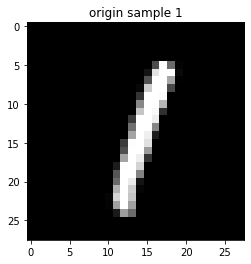

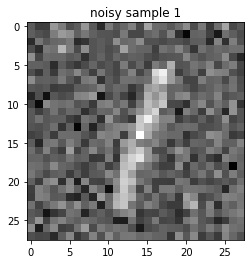

the accuracy on noisy data:  0.981


In [ ]:
# pick a well classified sample
index = 1
print("well classified?", index not in ind)

origin = xt2[index]
pl.figure()
pl.imshow(xt2[index].reshape(28, 28), cmap='gray')
pl.title('origin sample %d' %yt2[index])
pl.show()

# create 1000 noisy samples
noisy = []
level = 0.3
for i in range(1000):
  noisy.append(origin + level * np.random.randn(xt2.shape[1]))

pl.figure()
pl.imshow(noisy[0].reshape(28, 28), cmap='gray')
pl.title('noisy sample %d' %yt2[index])
pl.show()

# compute accuracy
pred_n = clf_svc_d.predict(noisy)
true_label = np.ones(1000) * yt2[index]
acc_n = accuracy_score(true_label, pred_n)
print('the accuracy on noisy data: ', acc_n)

### How robust is the clasifier? Visualise some of those "adversarial" examples when the accuracy on the noisy samples is not 1.

19


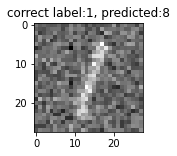

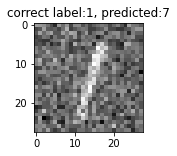

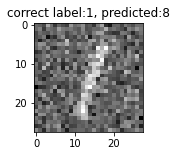

In [ ]:
# get the noisy sample which the accuracy is not 1
ind_n = []
for i in range(true_label.shape[0]):
  if true_label[i] != pred_n[i]:
    ind_n.append(i)
print(len(ind_n))

pl.figure(figsize=(3,2))
pl.imshow(noisy[ind_n[0]].reshape(28, 28), cmap = 'gray')
pl.title('correct label:%d, predicted:%d' %(true_label[0], pred_n[ind_n[0]]))
pl.show()
pl.figure(figsize=(3,2))
pl.imshow(noisy[ind_n[1]].reshape(28, 28), cmap = 'gray')
pl.title('correct label:%d, predicted:%d' %(true_label[0], pred_n[ind_n[1]]))
pl.show()
pl.figure(figsize=(3,2))
pl.imshow(noisy[ind_n[2]].reshape(28, 28), cmap = 'gray')
pl.title('correct label:%d, predicted:%d' %(true_label[0], pred_n[ind_n[2]]))
pl.show()

Answer: The classifier is robust up to a noise level 0.3, here we get accuracy = 0.986, while level is 0.2 we have perfect output, so the max noisy level is 0.3, and the adversarial examples are missclassified by the classifier is still recognizable by human.

## Convolutional Neural network(CNN)

### Implement a CNN and train it on the data. Investigate the performance of the CNN when varying parameters. Does it have better performance than model above?

In [ ]:
# create a model
import torch
import torch.nn as nn
import torch.optim as optim

cnn_model = torch.nn.Sequential(
    torch.nn.Conv2d(1, 32, (3, 3), stride=(1, 1), padding='same'),
    torch.nn.ReLU(),
    torch.nn.Conv2d(32, 32, (3, 3), stride=(1, 1), padding='same'),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2, 2), stride=(2, 2)),
    torch.nn.Flatten(),
    torch.nn.Linear(int((28*28/4)*32), 3),

)

# define loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.01)

In [ ]:
# change labels from 1,7,8 to 0,1,2
def change_labels(labels):
  new_labels = np.zeros(labels.shape[0])
  for i in range(labels.shape[0]):
    if labels[i] == 1:
      new_labels[i] = 0
    if labels[i] == 7:
      new_labels[i] = 1
    if labels[i] == 8:
      new_labels[i] = 2
  return new_labels


In [ ]:
# create dataset
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomImageDataset(Dataset):
  def __init__(self, labels, img):
    self.img_labels = labels.ravel()
    self.img = img


  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    image = self.img[idx]
    image = image.reshape(1, 28, 28)
    label = self.img_labels[idx]
    return image, label

training_data = CustomImageDataset(change_labels(y2), x2)
test_data = CustomImageDataset(change_labels(yt2), xt2)

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
def train(dataloader, model, c, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch_idx, (imgs, labels) in enumerate(dataloader):
      #X, y = X.to(device), y.to(device)

      # Compute prediction error
      imgs=imgs.to(torch.float32)
      pred = model(imgs)
      labels = labels.long()
      loss = c(pred,labels)

      # Backpropagation
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if batch_idx % 10 == 0:
        loss, current = loss.item(), batch_idx * len(imgs)
        print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
# test
def test(dataloader, model, criterion):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for (imgs, labels) in dataloader:
      #X, y = X.to(device), y.to(device)
      imgs=imgs.to(torch.float32)
      pred = model(imgs)
      #print(pred)
      labels = labels.long()
      #print(labels)
      test_loss += criterion(pred, labels).item()
      correct += (pred.argmax(1) == labels).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, cnn_model, criterion, optimizer)
    test(test_dataloader, cnn_model, criterion)
print("Done!")

Epoch 1
-------------------------------
loss: 1.098964  [    0/ 3000]
loss: 0.119098  [  640/ 3000]
loss: 0.160032  [ 1280/ 3000]
loss: 0.013442  [ 1920/ 3000]
loss: 0.038730  [ 2560/ 3000]
Test Error: 
 Accuracy: 97.6%, Avg loss: 0.069783 

Epoch 2
-------------------------------
loss: 0.010457  [    0/ 3000]
loss: 0.092213  [  640/ 3000]
loss: 0.015110  [ 1280/ 3000]
loss: 0.059948  [ 1920/ 3000]
loss: 0.003959  [ 2560/ 3000]
Test Error: 
 Accuracy: 98.5%, Avg loss: 0.046418 

Epoch 3
-------------------------------
loss: 0.013995  [    0/ 3000]
loss: 0.023762  [  640/ 3000]
loss: 0.121751  [ 1280/ 3000]
loss: 0.029476  [ 1920/ 3000]
loss: 0.037332  [ 2560/ 3000]
Test Error: 
 Accuracy: 98.1%, Avg loss: 0.053981 

Epoch 4
-------------------------------
loss: 0.051449  [    0/ 3000]
loss: 0.024038  [  640/ 3000]
loss: 0.007723  [ 1280/ 3000]
loss: 0.008709  [ 1920/ 3000]
loss: 0.180986  [ 2560/ 3000]
Test Error: 
 Accuracy: 99.3%, Avg loss: 0.032700 

Epoch 5
------------------------

Answer: The performance of CNN relies very much on the chose of parameters, for learing rate, both 0.02 and 0.005 gives a bad result in 5 epoches, and 0.01 gives the best result, this is a trade off between accuracy and speed. the number of nurons also influence the outcome, if I choose 64 hidden nurons in a layer, the training is much slower, and the accuracy is wrose, this is might because of the overfitting, so I choose 32.  
After choosing the good parameters, the CNN gives an accuracy of 0.987, which is better than any of the methods, turns out CNN is a powerful tool for image classification, but the price is the computing time, CNN is much slower than other methods, but once it's trained, it can give a real good performance.

### CNN robustness compare with SVC

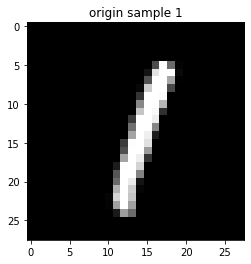

In [ ]:
# use cnn on adversarial examples.

index = 1

origin = xt2[index]
pl.figure()
pl.imshow(xt2[index].reshape(28, 28), cmap='gray')
pl.title('origin sample %d' %yt2[index])
pl.show()

# create 1000 noisy samples
noisy = []
level = 0.3
for i in range(1000):
  noisy.append(origin + level * np.random.randn(xt2.shape[1]))

we choose the same example as before.

In [ ]:
# compute accuracy
true_label = np.ones(1000) * yt2[index]
noisy_data = CustomImageDataset(change_labels(true_label), noisy)
noisy_dataloader = DataLoader(noisy_data, batch_size=64, shuffle=True)

test(noisy_dataloader, cnn_model, criterion)

Test Error: 
 Accuracy: 32.9%, Avg loss: 1.919133 



The CNN perform badly when use the same noise level as SVC, so CNN is less robuts to noise.

In [ ]:
noisy = []
level = 0.2
for i in range(1000):
  noisy.append(origin + level * np.random.randn(xt2.shape[1]))

# compute accuracy
true_label = np.ones(1000) * yt2[index]
noisy_data = CustomImageDataset(change_labels(true_label), noisy)
noisy_dataloader = DataLoader(noisy_data, batch_size=64, shuffle=True)

test(noisy_dataloader, cnn_model, criterion)  

Test Error: 
 Accuracy: 99.3%, Avg loss: 0.059038 



Answer: By decreasing the noise level to 0.2, we still can get perfect accuracy, so CNN is very sensitive to noise, this is true because a small change in the image could change the performance of a CNN.

# Discussion

This part is interesting since we are doing a practical application, by showing the features in a scatter plot, we can see the role of featrues, and by using different models we can get the important variables which corrsepond to what we know in reality.  
The part the are difficult are how to select good parameters and which parameter to use in cross validation.  
Parameter selection is indeed a challenge in machine learning models, I need more knowledge in the model to choose the right parameters in cross validation, if we don't know anything about the right parameter to use, the cross validation could take a long time. And interestingly, the cross validation doesn't always improve the performance, especially for some linear classification models, maybe they are less sencetive to parameters.  
For the evaluation, accuracy is not always the good metrice, it depends on the application, in medical perspective, and when the data is inbalanced, we should maybe look at the AUC score which evaluates the model itself, and sometimes we would loss some accuracy to improve other features, like FNR.  
Another difficulity is how to build a CNN model, how to choose the number of layers, how to choose the number of nerons and how to choose the good objective fucntion, since we don't know what is inside a NN, build a network requirs more experience.  
Overall, this is a good practice to show every model we seen in class and try to figure out the influence of some parameters, makes me gain more knowledge on what I'm doing.